<a href="https://colab.research.google.com/github/adriadescals/MaximumSeparation_method/blob/master/Copy_of_MS_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of the Maximum Separation method
This notebook shows the Python implementation of the Maximum Separation method, a variant of the threshold method for phenology metric estimation. 

Adrià Descals - a.descals@creaf.uab.cat / CREAF - Centre de Recerca Ecològica i Aplicacions Forestals


In [1]:
# clone the repository with the data
! git clone https://github.com/adriadescals/MaximumSeparation_method.git

Cloning into 'MaximumSeparation_method'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data
pathCsv = '/content/MaximumSeparation_method/toy_timeSeries.csv'
df = pd.read_csv(pathCsv) 

DOY = df.DOY.to_numpy()
GCC = df.GCC.to_numpy()

Text(0, 0.5, 'GCC')

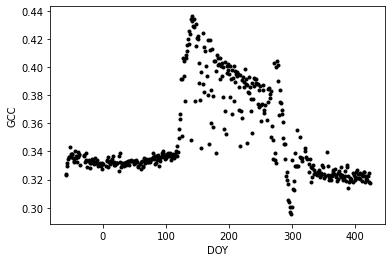

In [4]:
# plot the time series
plt.plot(DOY, GCC,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC')

In [38]:
# Define the window size 
wsize = 30; 

# Define threshold dynamically (percentage of the amplitude)
p = 50  # percentage

bio_min = np.percentile(GCC, 5)
bio_max = np.percentile(GCC, 95)
amplitude = bio_max-bio_min

thresh = amplitude*p/100+bio_min;
print('threshold = ' + str(thresh))


threshold = 0.36551


Text(0, 0.5, 'GCC>thresh')

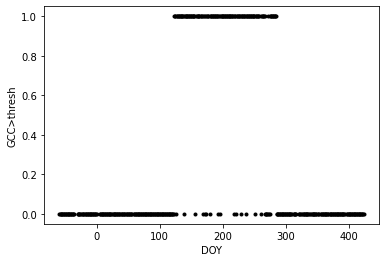

In [39]:
# Convert the original data into a binary time series
bio_bin = GCC>thresh; 

plt.plot(DOY, bio_bin,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC>thresh')

Text(0, 0.5, 'diff')

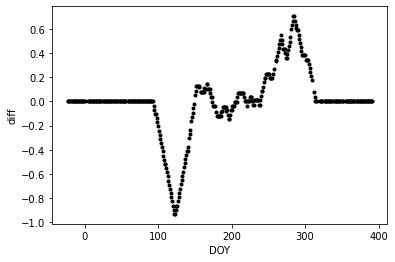

In [40]:
# Estimate the ratio of observations above the threshold before and after each day of the time series
DOYdiff = np.array(DOY[wsize:-wsize],ndmin=2)
D = np.zeros((1,DOYdiff.shape[1]), dtype=float)
for idoy in np.nditer(DOYdiff.T):
  bin1 = bio_bin[np.logical_and(DOY>(idoy-wsize),DOY<idoy)]
  bin2 = bio_bin[np.logical_and(DOY<(idoy+wsize),DOY>idoy)]

  p1 = np.sum(bin1)/bin1.shape;
  p2 = np.sum(bin2)/bin2.shape;

  D[DOYdiff==idoy] = p1-p2

plt.plot(DOYdiff, D,'.k')
plt.xlabel('DOY')
plt.ylabel('diff')

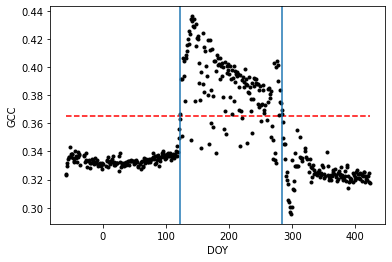

In [46]:
# Find the Start of Season (minimum value of D) and the End of Season (maximum value in D)
SoS = DOYdiff[0,np.argmin(D)]
EoS = DOYdiff[0,np.argmax(D)]

plt.plot(DOY, GCC,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC')
plt.axvline(x=SoS)
plt.axvline(x=EoS)
plt.hlines(y = thresh, xmin = min(DOY), xmax = max(DOY), color ='r',linestyles='dashed') 